In [49]:
import pandas as pd
from collections import Counter
import re
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [50]:
df = pd.read_csv("C:/Users/Vidyajay/Desktop/FAKE NEWS DETECTION/SourceCode/Cleaning Data/NYT.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 4 columns):
_id         2933 non-null object
headline    2933 non-null object
pub_date    2933 non-null object
body        2933 non-null object
dtypes: object(4)
memory usage: 91.7+ KB


In [52]:
df = df.reset_index()

In [53]:
df.headline[29]

'{"main":"Overlooked No More: Marthe McKenna, Nurse Who Spied for the British in World War I","kicker":null,"content_kicker":null,"print_headline":"Marthe McKenna, Nurse Who Spied for the British in World War I","name":null,"seo":null,"sub":null}'

In [54]:
# Getting only needed main headline
lst_head = []
for idx,item in enumerate(df.headline): 
    lst_head.append(" ".join(df.headline[idx].replace("'","").split(",")[0].split(" ")[1:]))

In [55]:
df['head1']=lst_head
df['headline']=lst_head

In [56]:
df.head()

,index,_id,headline,pub_date,body,head1
0,0,5b995d47068401528a2daa07,"Are You Teaching the Midterms?""",2018-09-12T18:39:00+0000,A primary season that has already been full of...,"Are You Teaching the Midterms?"""
1,1,5b995d8f068401528a2daa08,"You Need to Know to Vote in New York’s Primary """,2018-09-12T18:40:12+0000,"On Thursday — yes, Thursday — voters across Ne...","You Need to Know to Vote in New York’s Primary """
2,2,5b995e89068401528a2daa0a,Best Photos From New York Fashion Week,2018-09-12T18:44:21+0000,The sixth day of New York Fashion Week was hos...,Best Photos From New York Fashion Week
3,3,5b996210068401528a2daa10,Blue,2018-09-12T18:59:25+0000,"Out of the blackness of the deep, deep ocean c...",Blue
4,4,5b99668d068401528a2daa19,"Owens to Guest Star on ‘NCIS: New Orleans’""",2018-09-12T19:18:35+0000,Geoffrey Owens is on the comeback trail. The f...,"Owens to Guest Star on ‘NCIS: New Orleans’"""


In [57]:
df.to_csv("C:/Users/Vidyajay/Desktop/FAKE NEWS DETECTION/SourceCode/Cleaning Data/NYT cleaned.csv")
df=pd.read_csv("C:/Users/Vidyajay/Desktop/FAKE NEWS DETECTION/SourceCode/Cleaning Data/NYT cleaned.csv")

In [60]:
tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tdf.fit(df.body)
transformed_text = vectorizer.transform(df.body)
transformed_title = vectorizer.transform(df['headline'].values.astype('U'))

In [61]:
def get_tfidf_term_scores(feature_names):
    '''Returns dictionary with term names and total tfidf scores for all terms in corpus'''
    term_corpus_dict = {}
    # iterate through term index and term 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

In [62]:
 #list of features created by tfidf
feature_names = tdf.get_feature_names()

In [63]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [64]:
def get_sorted_tfidf_scores(term_corpus_dict):
    '''Returns sort words from highest score to lowest score'''
    # sort indices from words wit highest score to lowest score
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    # move words and score out of dicts and into arrays
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    # sort words and scores
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    
    return termNames, scores

In [65]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [68]:
def plot_tfidf_scores(scores,termNames, n_words = 18):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (14, 18))
    
    override = {'fontsize': 'large'}

    fig.add_subplot(221)   
    n_words = 75
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title(" Top tfidf score words".format(n_words));
    plt.xlabel("TFIDF Score");


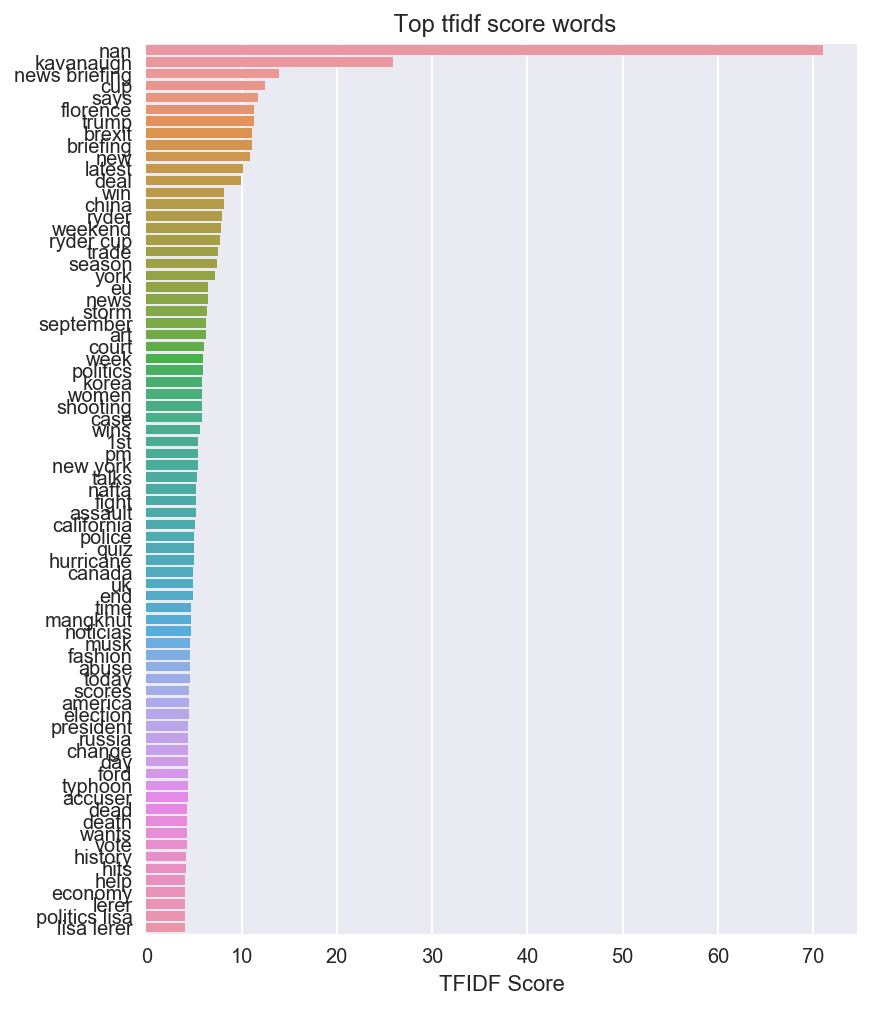

In [69]:

plot_tfidf_scores(scores, termNames, n_words = 18)